In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from  matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn
from sklearn.metrics.cluster import normalized_mutual_info_score
seaborn.set(style='ticks')

In [66]:
df= pd.read_csv('./données/spiral.txt',sep="\t",header=None)
df.columns = ["V1", "V2", "Y"]
df.head()
np.unique(df["Y"])

array([1, 2, 3], dtype=int64)

In [5]:
df.head()

,V1,V2,Y
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
V1    312 non-null float64
V2    312 non-null float64
Y     312 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.describe()

,V1,V2,Y
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


In [8]:
print("nombre d'elt classe 1:",len(df[df['Y'] == 1]))
print("nombre d'elt classe 2:",len(df[df['Y'] == 2]))
print("nombre d'elt classe 3:",len(df[df['Y'] == 3]))

nombre d'elt classe 1: 101
nombre d'elt classe 2: 105
nombre d'elt classe 3: 106


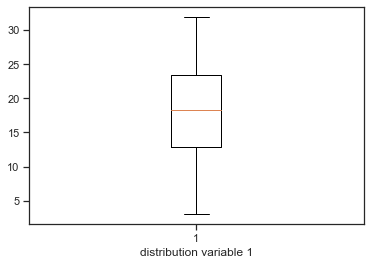

In [121]:
fig = plt.figure()
plt.boxplot(df['V1'])
plt.xlabel('distribution variable 1' )
plt.show()

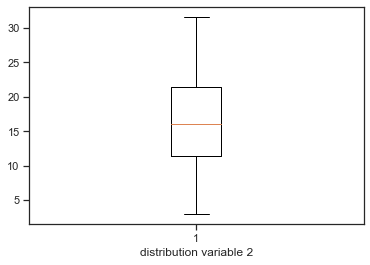

In [122]:
fig = plt.figure()
plt.boxplot(df['V2'])
plt.xlabel('distribution variable 2' )
plt.show()

[1, 2, 3]
(3,)


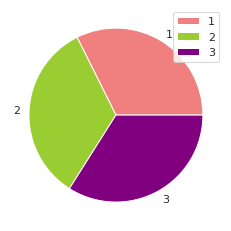

In [0]:
x = [101,105,106]
vectLab=np.unique(df["Y"]).tolist()
print(vectLab)
print(np.unique(df["Y"]).shape)
color_map = ['#F08080',  "yellowgreen",   'purple']
plt.pie(x, labels =vectLab ,colors=color_map)
plt.legend()
plt.show()

0
1
2


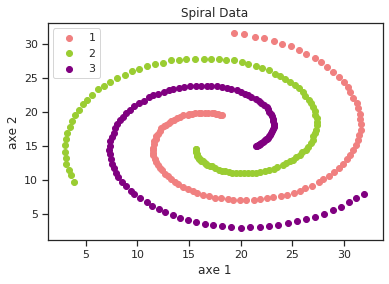

In [0]:
color_map = {0: '#F08080', 1: "yellowgreen", 2:  'purple'}
for idx, cl in enumerate(np.unique(df['Y'])):
       print(idx)
    plt.scatter(x=df.loc[df['Y'] == cl, "x1"], y=df.loc[df['y'] == cl, "x2"], c=color_map[idx], marker='o', label=cl)
       
plt.xlabel('axe 1')
plt.ylabel('axe 2')
plt.legend(loc='upper left')
plt.title('Spiral Data')
plt.show()
#DDA0DD

Data modeling

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[['V1','V2']],df['Y'], test_size=0.02, random_state=0)

In [104]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
data = {'Algorithme':['Reg Log'],'Accuracy':[logreg_cv.best_score_]}
models_dataframe=pd.DataFrame.from_dict(data)
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.32086


In [54]:
#GaussianNB().get_params().keys()
gnb = GaussianNB()
y_predNB = gnb.fit(X_train, y_train).predict(X_test)

In [55]:
accuracy_score(y_predNB,y_test)

0.5714285714285714

In [107]:
models_dataframe.loc[1] = {'Algorithme':'NB','Accuracy': accuracy_score(y_predNB,y_test)}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429


K Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [57]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

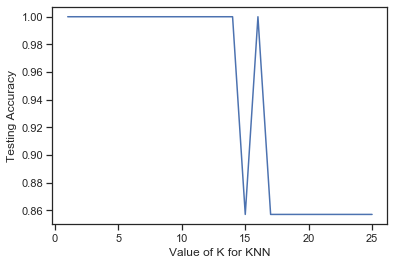

In [58]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [61]:
skf = StratifiedKFold(n_splits=5)
knn = KNeighborsClassifier(n_neighbors = 12)
scores=cross_val_score(knn,X_train, y_train, cv=skf)

In [62]:
scores

array([0.96721311, 0.96721311, 0.90163934, 0.95081967, 1.        ])

In [108]:
models_dataframe.loc[2] = {'Algorithme':'KNN','Accuracy': scores.mean()}

In [109]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377


In [68]:
lda = LDA(n_components=2)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(lda, X_train, y_train, cv=skf)

In [110]:
models_dataframe.loc[3] = {'Algorithme':'LDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377
3,LDA,0.301639


In [71]:
qda = QDA()
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(qda, X_train, y_train, cv=skf)

In [111]:
models_dataframe.loc[4] = {'Algorithme':'QDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377
3,LDA,0.301639
4,QDA,0.301639


In [74]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [80]:
parameter = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [75]:
skf = StratifiedKFold(n_splits=5)
svmLN = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, cv=skf)
svmLN.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
print('Best C:',svmLN.best_estimator_.C) 
print('Best Kernel:',svmLN.best_estimator_.kernel)

Best C: 1000
Best Kernel: linear


In [77]:
svmLN.best_score_

0.29180327868852457

In [112]:
models_dataframe.loc[5] = {'Algorithme':'SVM Linear','Accuracy': svmLN.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377
3,LDA,0.301639
4,QDA,0.301639
5,SVM Linear,0.291803


In [81]:
skf = StratifiedKFold(n_splits=5)
svmrbf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter, cv=skf)
svmrbf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
models_dataframe.loc[6] = {'Algorithme':'SVM RBF','Accuracy': svmrbf.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377
3,LDA,0.301639
4,QDA,0.301639
5,SVM Linear,0.291803
6,SVM RBF,0.891803


In [92]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,4,5,6,7,8,9,10,11,12,15,20]}
skf = StratifiedKFold(n_splits=5)
dtc = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=skf)
dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [114]:
models_dataframe.loc[7] = {'Algorithme':'Tree D','Accuracy': dtc.best_score_}

In [115]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.320860
1,NB,0.571429
2,KNN,0.957377
3,LDA,0.301639
4,QDA,0.301639
5,SVM Linear,0.291803
6,SVM RBF,0.891803
7,Tree D,0.983607


Random forest

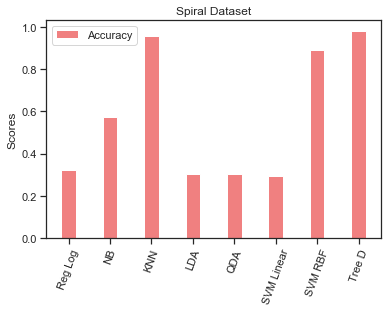

In [120]:
labels=models_dataframe.Algorithme.values
x = np.arange(len(models_dataframe.Algorithme.values ))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects2 = ax.bar(x, models_dataframe.Accuracy.values , width, label='Accuracy',color='#F08080')
ax.set_ylabel('Scores')
ax.set_title('Spiral Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=70)
ax.legend()